In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import sys

In [3]:
# def get_times(exp):
#     return np.array(sorted([float(i) for i in os.listdir(f"./xifoams_calcs/{exp}/postProcessing/sampleDict/")]))


In [4]:
f = open("../openfoam_cases/task.txt", "r")
tasks = np.array([list(map(float, i.strip().split())) for i in f.readlines()])
H = tasks[:, 0]
W = tasks[:, 1]*2
T = tasks[:, 2]

In [5]:
H

array([0.01, 0.02, 0.03, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04])

In [10]:
import os
import sys
from scipy.optimize import curve_fit
def lin_model(x, a, b):
    return x * a + b

In [25]:
def proc(offff):
    print(os.listdir(offff))
    ts_str_ddof = sorted([i for i in os.listdir(offff) if i != "0" and str.isdecimal(i.replace(".", ""))], key=lambda x: float(x))
    # ts_str_df = sorted([i for i in os.listdir(f"./home/vasily/Projects/tf_cfd_results/1cm/postProcessing/sampleDict/") if i != "0"], key=lambda x: float(x))

    ts = np.array(list(map(float, ts_str_ddof)))
    print(ts)
    xs_ddof = np.zeros(len(ts))
    # xs_df = np.zeros(len(ts))
    for i in range(len(ts)):
        df = pd.read_csv(f"{offff}/{ts_str_ddof[i]}/data.csv")
        # df_df = pd.read_csv(f"./deepflame/postProcessing/sampleDict/{ts_str_df[i]}/data_T_H2_O2_H2O_N2_OH_HO2_p_rho.csv")
        # xs_df[i] = df_df["x"][df_df["OH"].argmax()]
        xs_ddof[i] = df["x"][abs(df["rho"]-0.9).argmax()]
    mask = (xs_ddof > 0.06) & (xs_ddof < 0.2)
    # xs_ddof[mask]
    (a, b), _ = curve_fit(lin_model, ts[mask], xs_ddof[mask])
    return a, ts, xs_ddof

In [26]:
N = 9
xs = [None for i in range(N)]
ts = [None for i in range(N)]
vel = [None for i in range(N)]
for exp in range(N):
    vel[exp], ts[exp], xs[exp] = proc(f"../openfoam_cases/xifoam_calcs/{exp+1}/postProcessing/sampleDict/")
#     ts_str_ddof = sorted([i for i in os.listdir(f"../openfoam_cases/xifoam_calcs/{exp+1}/postProcessing/sampleDict/") if i != "0"], key=lambda x: float(x))
#     # ts_str_df = sorted([i for i in os.listdir(f"./deepflame/postProcessing/sampleDict/") if i != "0"], key=lambda x: float(x))

#     ts_df[exp] = np.array(list(map(float, ts_str_ddof)))
#     xs_df[exp] = np.zeros(len(ts_df[exp]))

#     for i in range(len(ts_df[exp])):
#         df = pd.read_csv(f"../openfoam_cases/xifoam_calcs/{exp+1}/postProcessing/sampleDict/{ts_str_ddof[i]}/data.csv")
#         xs_df[exp][i] = df["x"][abs(df["rho"]-0.9).argmax()]

['0.065', '0.17', '0.025', '0.145', '0.07', '0.03', '0.11', '0.16', '0.155', '0.075', '0.12', '0.15', '0.195', '0.01', '0.045', '0.08', '0.13', '0.115', '0', '0.005', '0.105', '0.055', '0.085', '0.165', '0.2', '0.02', '0.14', '0.18', '0.095', '0.05', '0.04', '0.125', '0.185', '0.035', '0.06', '0.09', '0.1', '0.175', '0.135', '0.015', '0.19']
[0.005 0.01  0.015 0.02  0.025 0.03  0.035 0.04  0.045 0.05  0.055 0.06
 0.065 0.07  0.075 0.08  0.085 0.09  0.095 0.1   0.105 0.11  0.115 0.12
 0.125 0.13  0.135 0.14  0.145 0.15  0.155 0.16  0.165 0.17  0.175 0.18
 0.185 0.19  0.195 0.2  ]
['0.065', '0.17', '0.025', '0.145', '0.07', '0.03', '0.11', '0.16', '0.155', '0.075', '0.12', '0.15', '0.195', '0.01', '0.045', '0.08', '0.13', '0.115', '0', '0.005', '0.105', '0.055', '0.085', '0.165', '0.2', '0.02', '0.14', '0.18', '0.095', '0.05', '0.04', '0.125', '0.185', '0.035', '0.06', '0.09', '0.1', '0.175', '0.135', '0.015', '0.19']
[0.005 0.01  0.015 0.02  0.025 0.03  0.035 0.04  0.045 0.05  0.055 0.0

In [29]:
def make_data(file_path):
    return pd.read_csv(
        file_path,
        sep=',',                # Ensure correct delimiter
        decimal='.',            # Handle decimal format
        encoding='utf-8',       # Adjust if needed
        skiprows=0          # Skip non-data header rows
    )

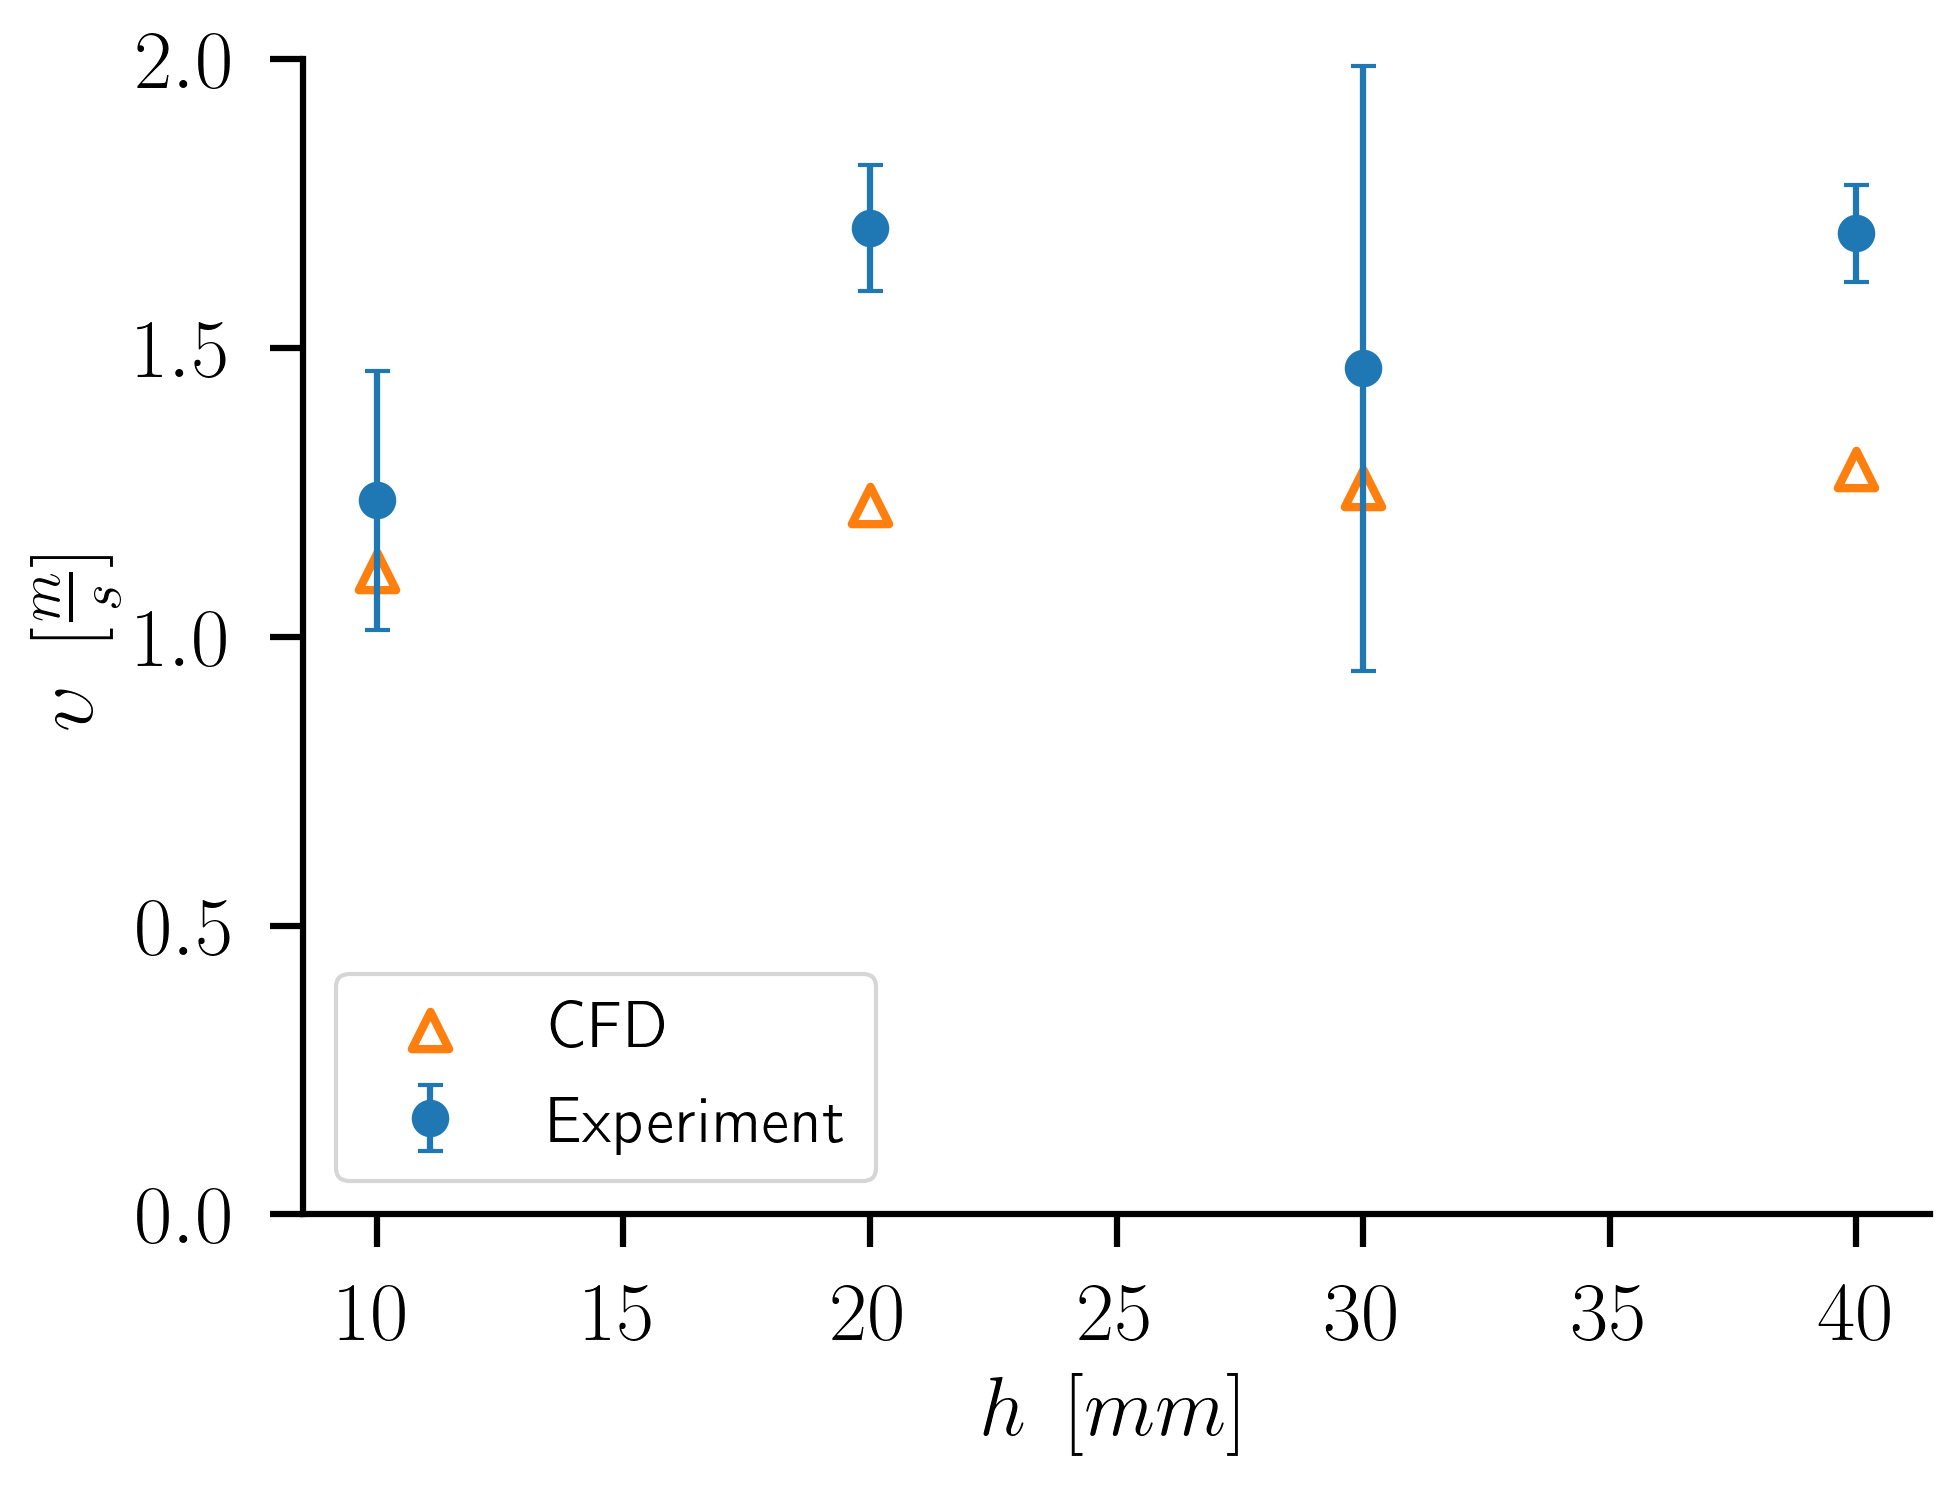

In [36]:
plt.rc('text', usetex=True)
plt.rc('text.latex',preamble=r' \usepackage[russian]{babel} \usepackage{amsmath}')
# plt.rc('text.latex',preamble=r'')
# plt.rc('text.latex',preamble=r'')
plt.rc('font', size=18)
# plt.rcParams['text.latex.preamble'] = r'\boldmath'/
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['figure.dpi'] = 300
plt.gca().spines[['right', 'top']].set_visible(False)
plt.rcParams['figure.figsize'] = [7, 5]
# plt.rc('font', family='Times New Roman')

ax = plt.gca()
ax.spines[['right', 'top']].set_visible(False)
ax_width = 1.5
ax.spines['left'].set_linewidth(ax_width)
ax.spines['bottom'].set_linewidth(ax_width)
ax.tick_params(axis='both', which='major', length=8, width=ax_width, direction='out', pad=8)

ax = plt.gca()
ax.spines[['right', 'top']].set_visible(False)
ax_width = 1.5
ax.spines['left'].set_linewidth(ax_width)
ax.spines['bottom'].set_linewidth(ax_width)
ax.tick_params(axis='both', which='major', length=8, width=ax_width, direction='out', pad=8)
plt.xlabel("$h$ [cm]")
plt.ylabel("$v$ [m/s]")
# hs = []
# vs = []
data_height = make_data("../video_proc/exp_height_vs_velocity.csv")
data_height
height = data_height["height"].to_numpy()
velocity = data_height["mean_velocity"].to_numpy()
std_velocity = data_height["std_velocity"].to_numpy()

# print(std_velocity)
std_velocity[2] *= 8 / 3

plt.errorbar(height, velocity, std_velocity * 3, fmt="o", capsize=3, markersize=8, label="Experiment")

plt.scatter(np.array(H)[(W == 0.01)&(T==300)]*1000, np.array(vel)[(W == 0.01)&(T==300)], marker="^", s=80,edgecolors='tab:orange', c="white", linewidth=2, label="CFD")

plt.xticks([10, 15, 20, 25, 30, 35, 40])
plt.xlabel('$h\\:\\: [mm]$')
plt.ylabel('$\\upsilon\\:\\:[\\frac{m}{s}]$')

plt.ylim(0, 2)
plt.legend()
plt.savefig("v_fun_h_cfd.pdf", bbox_inches="tight")

# for h in [1]:
#     v = proc(f"/home/vasily/Projects/tf_cfd_results/{h}cm_cubic/postProcessing/sampleDict")
#     vs.append(v)
#     hs.append(h)

# proc("/home/vasily/Projects/tf_cfd_results/2cm/postProcessing/sampleDict")plt.scatter(hs, vs)

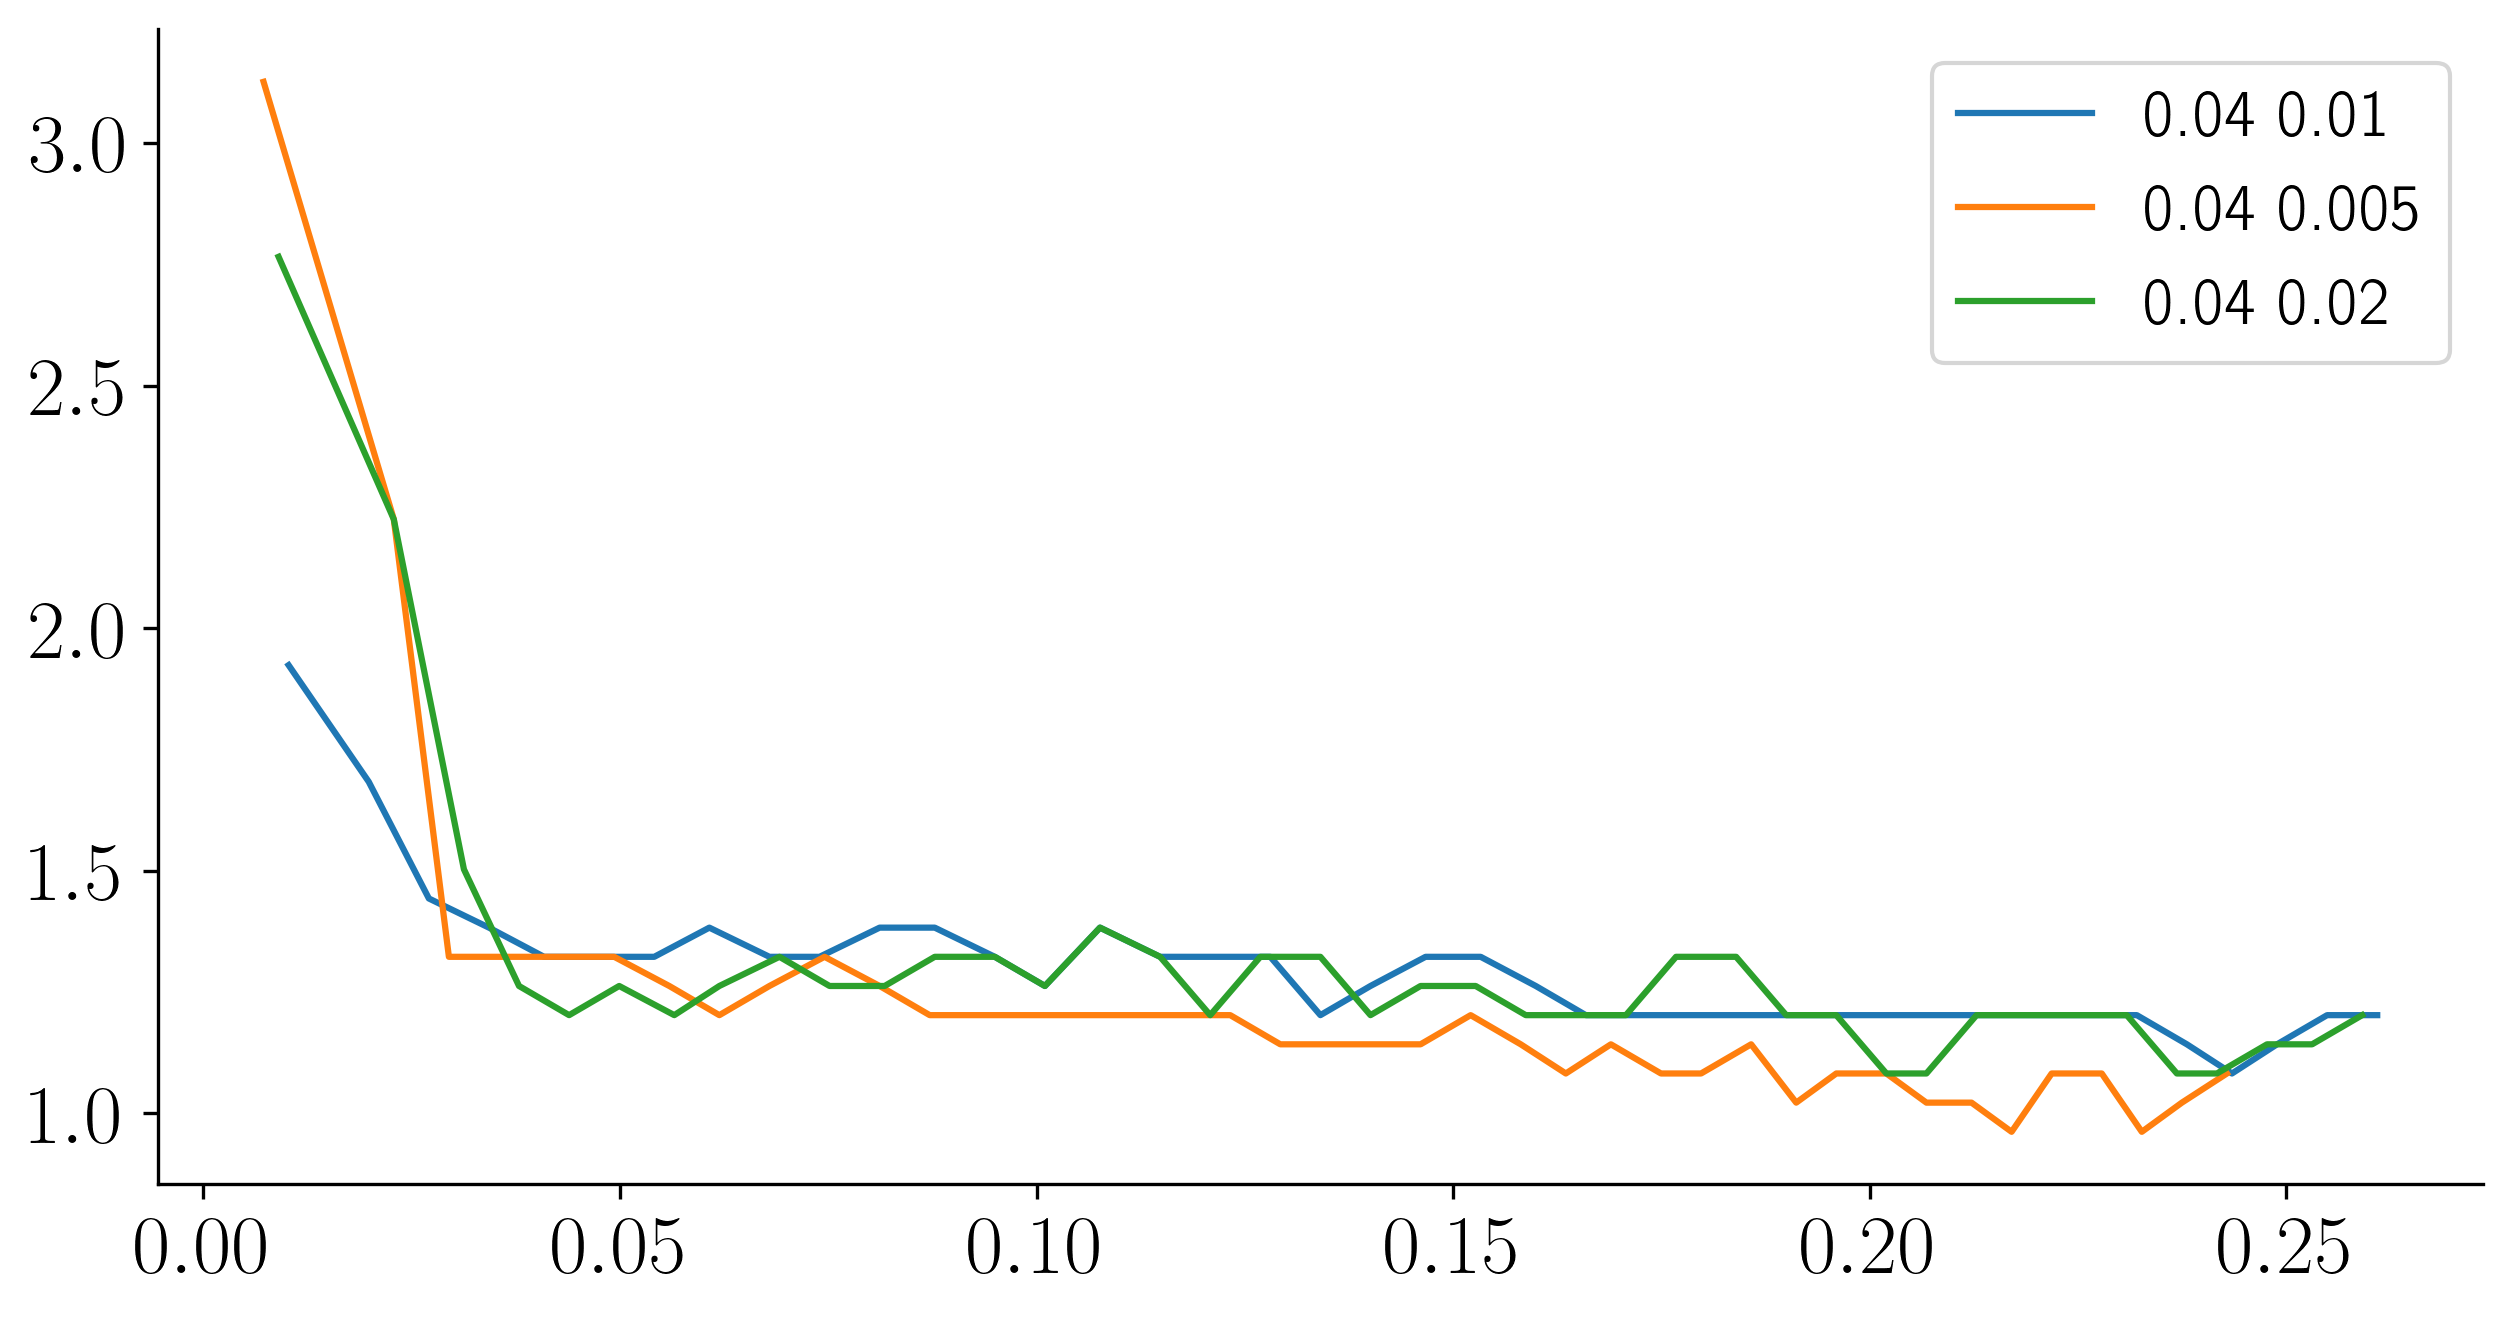

In [9]:
plt.rc('text', usetex=True)
plt.rc('text.latex',preamble=r' \usepackage[russian]{babel} \usepackage{amsmath}')
# plt.rc('text.latex',preamble=r'')
# plt.rc('text.latex',preamble=r'')
plt.rc('font', size=18)
# plt.rcParams['text.latex.preamble'] = r'\boldmath'/
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['figure.dpi'] = 300
plt.gca().spines[['right', 'top']].set_visible(False)
plt.rcParams['figure.figsize'] = [10, 5]

for i in range(3, 6):
    plt.plot(xs_df[i], np.gradient(xs_df[i])/np.gradient(ts_df[i]), label=f"{H[i]} {W[i]}")
plt.legend()